## Add Y3 redshift errors to the Abacus Mocks

In [ ]:
import os
import sys
import argparse
import fitsio
import numpy as np
from astropy.table import Table
from scipy.interpolate import interp1d
from cosmoprimo.fiducial import AbacusSummit

from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sys.path.append('/global/homes/s/shengyu/project_rc/main/Y3/')
from helper import REDSHIFT_VSMEAR, Y3_ZRANGE
from Y3_redshift_systematics import vsmear, vsmear_modelling

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


load /global/cfs/projectdirs/desi/users/jiaxiyu/repeated_observations/EDR_vs_Y3/LSS-scripts_repeats/QSO_z0.8-2.1_CDF.npz to add redshift uncertainties and catastrophics


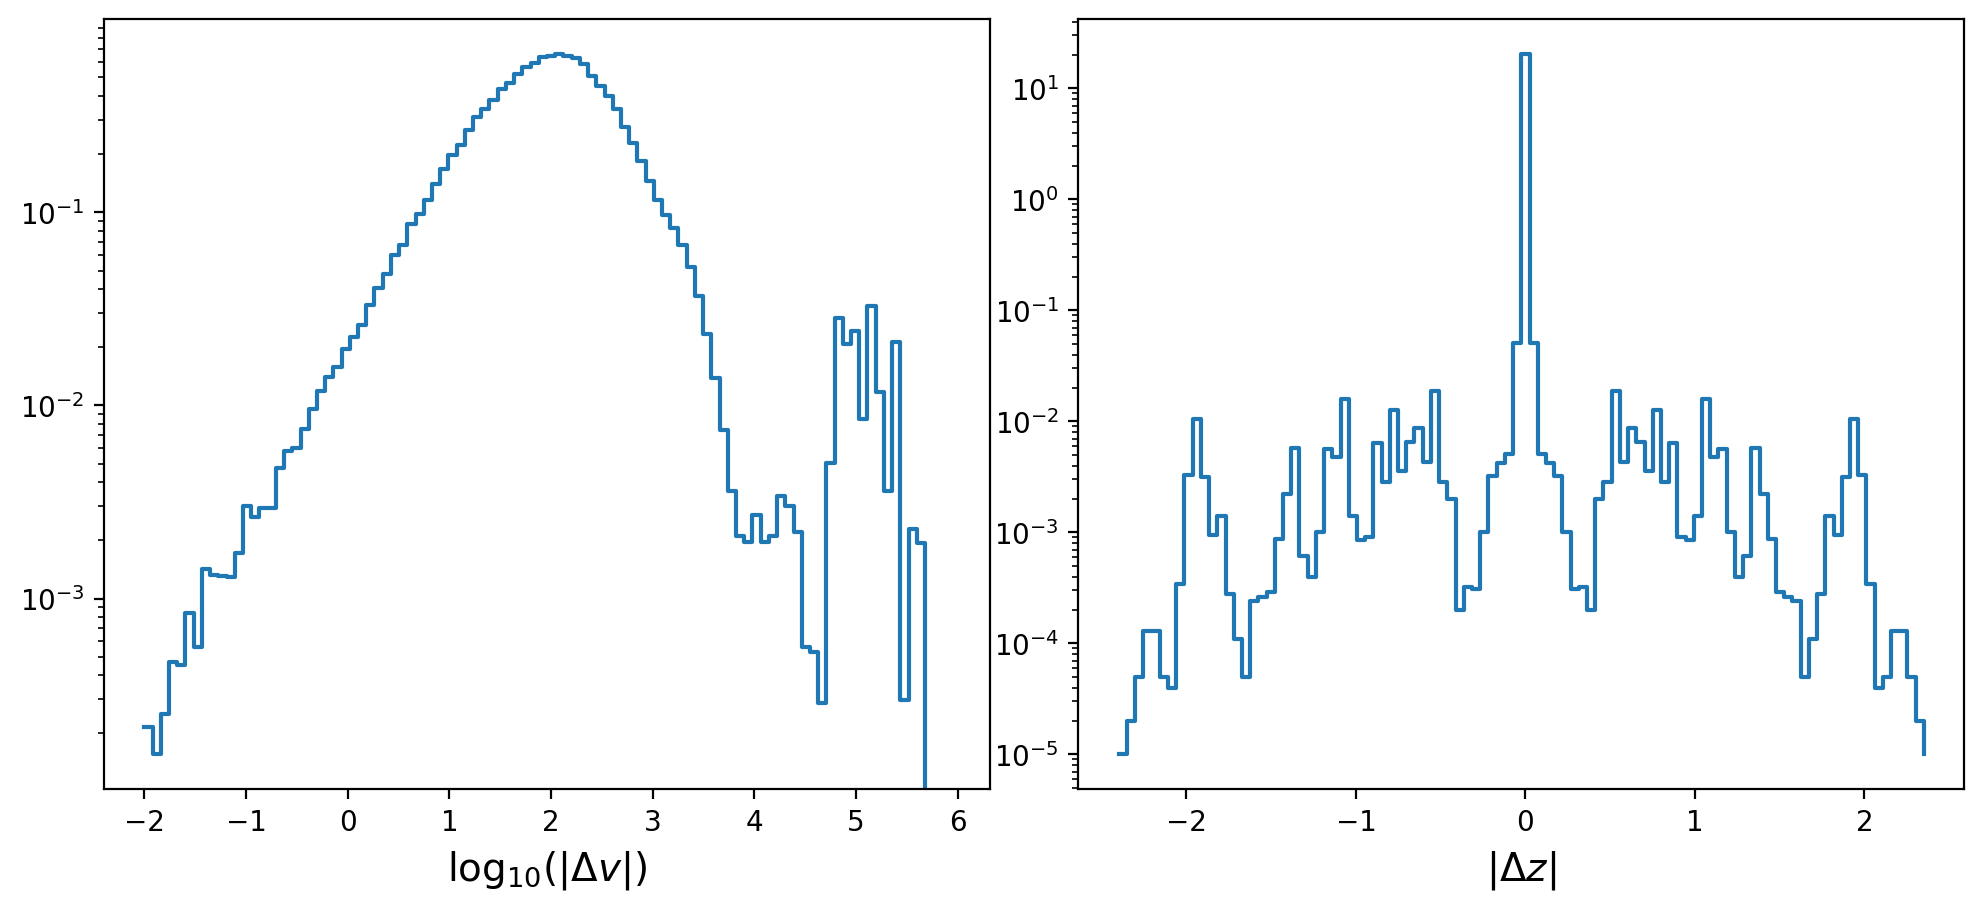

In [2]:
c = 299792 # speed of light in km/s
cosmo = AbacusSummit()

tracer = 'QSO' #　LRG, ELG_notqso, QSO
fig, ax = plt.subplots(1, 2, figsize = (12,5))
fig.subplots_adjust(wspace=0.1, hspace=0.05)
for z_index, (zmin, zmax) in enumerate(Y3_ZRANGE[tracer]):
    for mock_id in range(0,1):
        basedir = f'/pscratch/sd/s/shengyu/galaxies/catalogs/DA2/Abacus_v4_1/altmtl{mock_id}/kibo-v1/mock{mock_id}/LSScats'
        mock_fn = basedir+f'/{tracer}_clustering.dat.fits'
        catalog=Table(fitsio.read(mock_fn))
        if 'Z_DV_OBS' not in catalog.colnames:
            catalog['Z_DV_OBS'] = catalog['Z'].copy()
            zmid = (zmin+zmax)/2
            dv = vsmear(tracer, zmin=zmin, zmax=zmax, Ngal = len(catalog), seed=z_index*10+mock_id*100+1234)
            for i in range(2):
                if i == 0:
                    logdv = np.log10(abs(dv))
                    n1, bin_edges = np.histogram(logdv, bins=np.linspace(-2, 6, 100), density= True)
                    ax[i].semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
                    ax[i].set_xlabel(r'$\log_{10}(|\Delta v|)$')
                elif i == 1:
                    dz = dv*(1+zmid)/c
                    n1, bin_edges = np.histogram(dz, bins=np.linspace(-2.4, 2.4, 100), density=True)
                    ax[i].semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
                    ax[i].set_xlabel(r'$|\Delta z|$')